# Lesson 17: ggplot2

최규빈  
2023-07-26

# read mpg data

`-` ref: https://r4ds.had.co.nz/index.html

In [31]:
mpg = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/mpg.csv')
df

`-` 깃허브 저장소에 아예 데이터만 따로 모아서 관리하는 것도 좋은
방법입니다.

## data 설명

`-` `displ`: 자동차의 엔진크기

`-` `hwy`: 연료의 효율, 동일한 연료로 얼마나 멀리 가느냐?

`-` 자세한 설명은 R에서 `?mpg`를 이용해 스스로 찾아볼 것

# p9를 이용한 산점도 (2차원)

## python에서: plotnine을 이용한 산점도

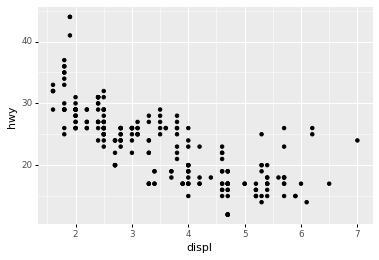

In [35]:
ggplot(data=mpg) + geom_point(mapping=aes(x='displ',y='hwy')) ## plotnine

-   산점도 해석: 엔진크기가 클수록 효율이 낮음.

`-` 빠르게 그리기: `data=`와 `mapping=`은 생략가능함

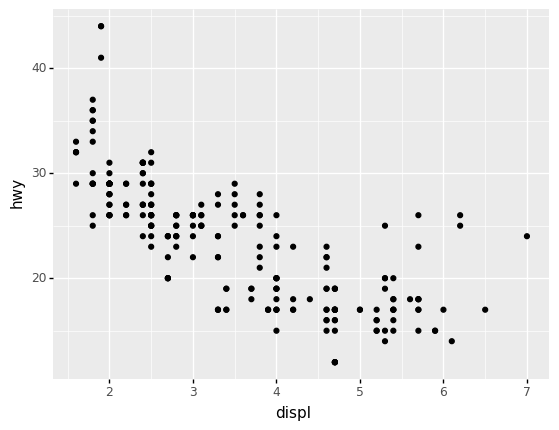

In [39]:
ggplot(mpg) + geom_point(aes(x='displ',y='hwy')) ## plotnine

## 객체지향적인 느낌으로 산점도 그리기

***step1: 도화지를 준비한다.***

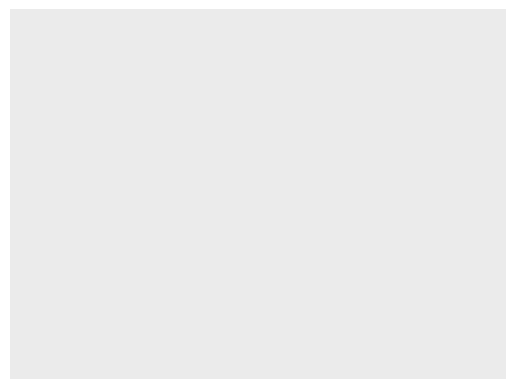

In [40]:
fig = ggplot(data=mpg)
fig

***step2*** 변수와 에스테틱사이의 맵핑을 설정한다.

In [42]:
a1= aes(x='displ',y='hwy')
a1

***step3*** 점들의 집합을 만든다. 즉 포인트 지옴을 만든다.

In [43]:
point1=geom_point(mapping=a1)

-   geom_point(): 점들을 그려! 어떻게?
-   `a1`에서 설정된 표를 보고

***step4*** 도화지와 지옴을 합친다.

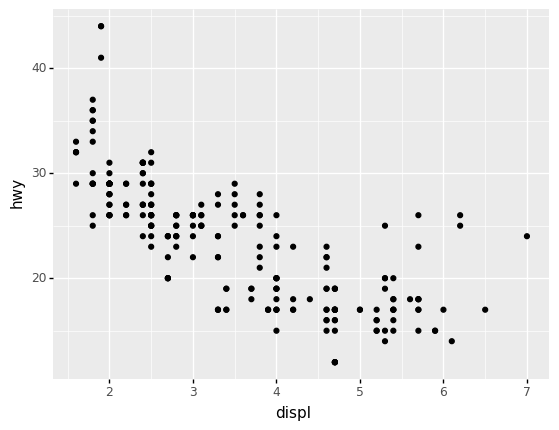

In [48]:
fig+point1

# p9를 이용한 산점도 (3차원)

`-` 데이터를 다시 관찰

In [110]:
mpg.head()

`-` class도 함께 plot에 표시하면 데이터를 탐색할때 좀 더 좋을 것 같다.

## 산점도 + 점크기변경

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using size for a discrete variable is not advised.

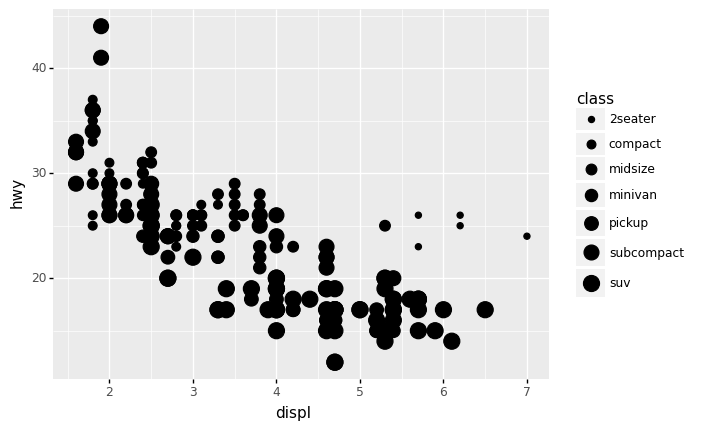

In [111]:
ggplot(data=mpg) + geom_point(mapping = aes(x='displ',y='hwy',size='class'))

## 산점도 + 투명도변경

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/scales/scale_alpha.py:70: PlotnineWarning: Using alpha for a discrete variable is not advised.

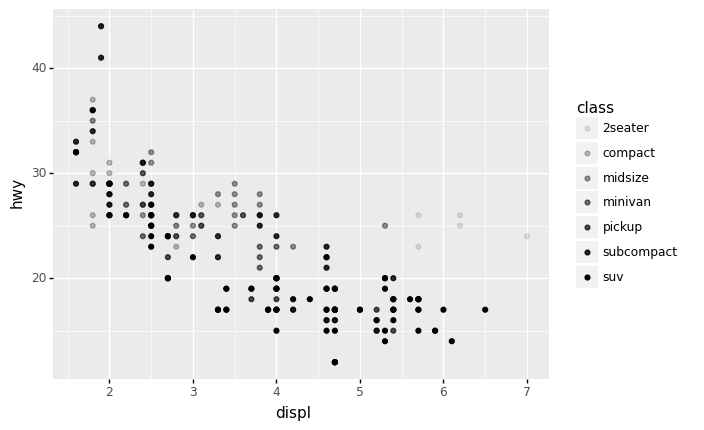

In [112]:
ggplot(data=mpg) + geom_point(mapping = aes(x='displ',y='hwy',alpha='class'))

## 산점도 + 투명도/점크기를 동시에 적용

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/scales/scale_alpha.py:70: PlotnineWarning: Using alpha for a discrete variable is not advised.
/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using size for a discrete variable is not advised.

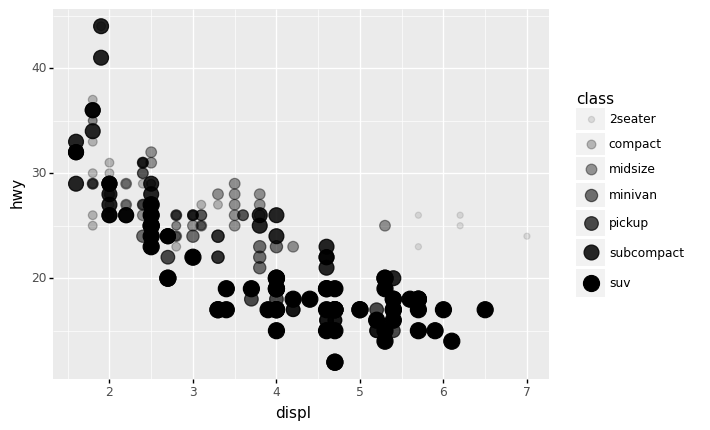

In [113]:
ggplot(data=mpg) + geom_point(mapping = aes(x='displ',y='hwy',alpha='class',size='class'))

## 산점도 + 형태

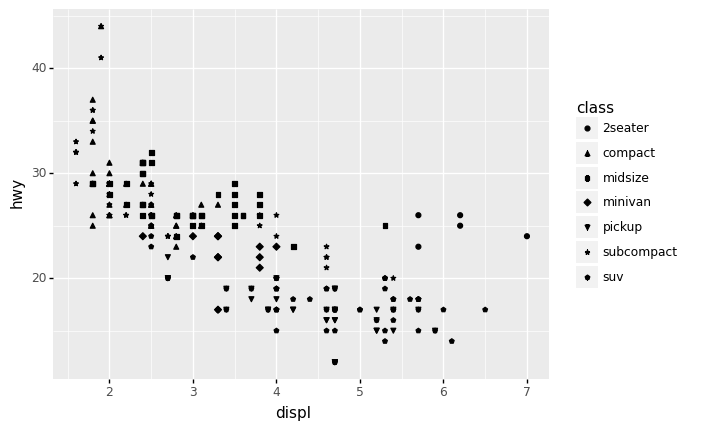

In [114]:
ggplot(data=mpg) + geom_point(mapping = aes(x='displ',y='hwy',shape='class'))

## 산점도 + 색깔

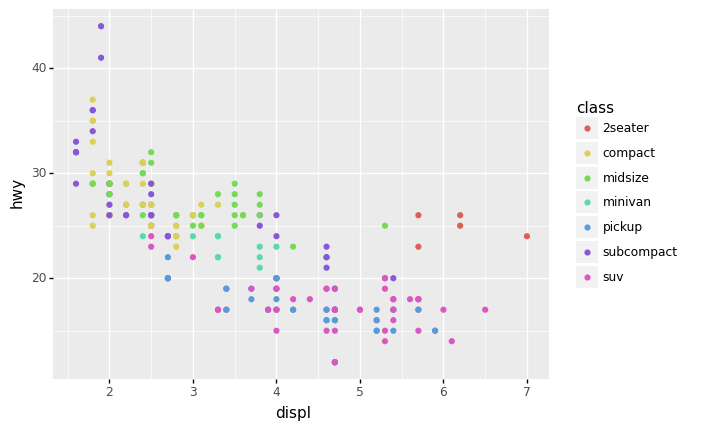

In [115]:
ggplot(data=mpg) + geom_point(mapping = aes(x='displ',y='hwy',color='class'))

## 객체지향적 느낌으로?

In [49]:
a2 = aes(x='displ', y='hwy', color='class') 

In [50]:
a1,a2

In [51]:
point2=geom_point(a2)

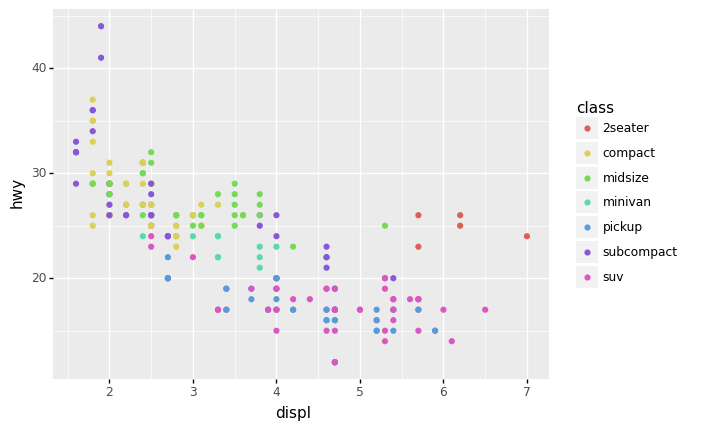

In [54]:
fig+point2

## 산점도 + 색깔 + 적합선

`-` 일단 색깔이 없는 포인트 지옴부터 연습

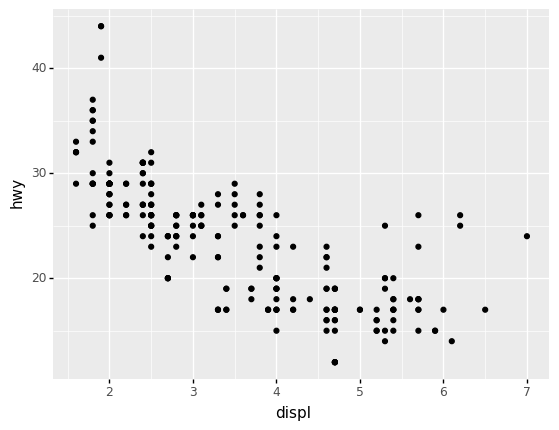

In [55]:
fig+point1

In [57]:
line1 = geom_smooth(a1)

/home/cgb2/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.

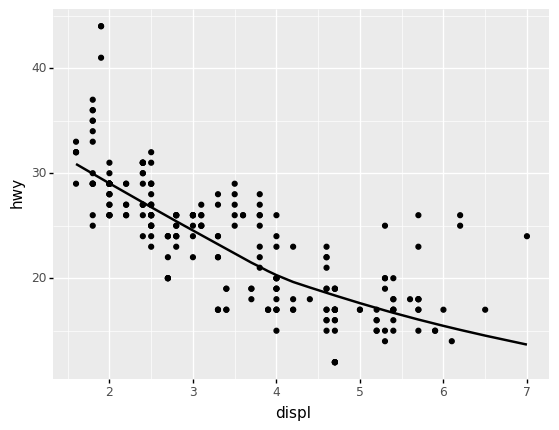

In [63]:
fig+point1+line1

`-` point1(색깔없는 포인트 지옴)을 point2(색깔있는 포인트 지옴)으로
언제든지 바꿔치기 가능!

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.

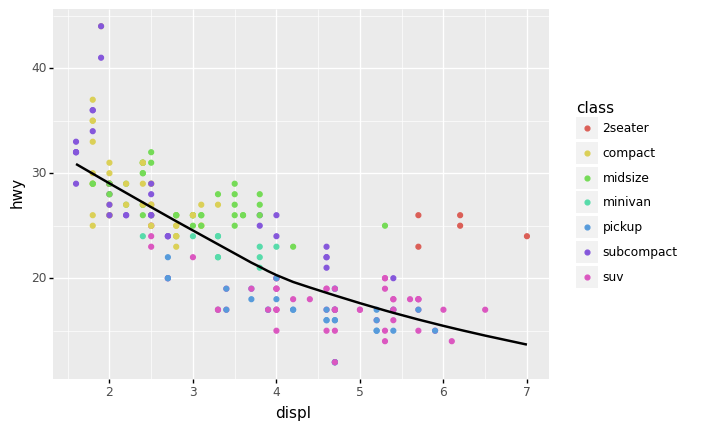

In [136]:
fig+point2+line1

`-` 명령어로 한번에 그리기

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.

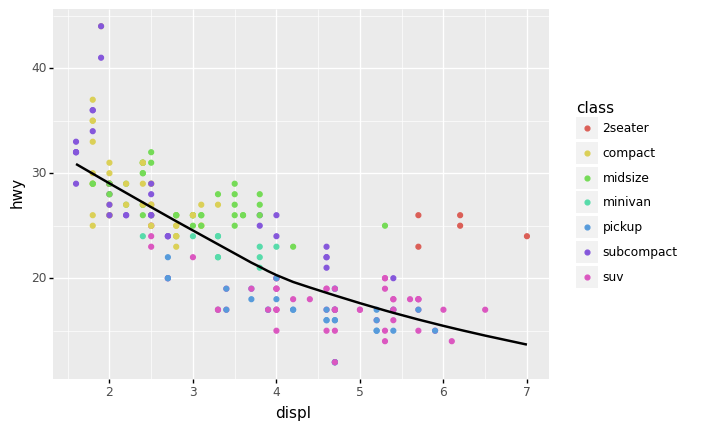

In [142]:
ggplot(data=mpg) + \
geom_point(mapping=aes(x='displ',y='hwy',color='class')) + \
geom_smooth(mapping=aes(x='displ',y='hwy'))

`-` 공통적인 맵핑규칙은 ggplot()쪽으로 빼기도 한다. (figure를 선언하는
곳에서 공통으로 선언함)

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.

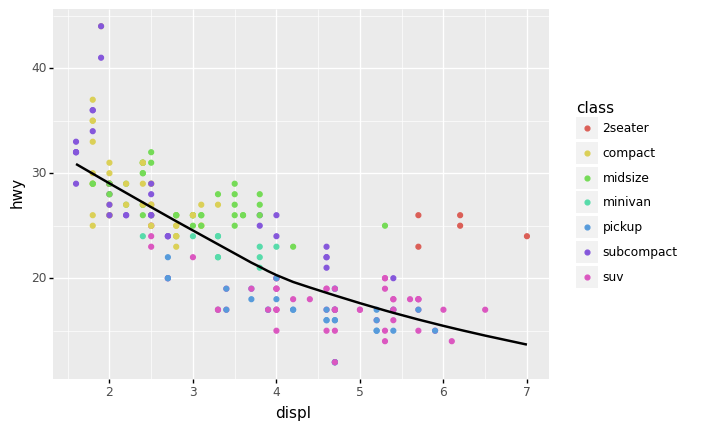

In [143]:
ggplot(data=mpg,mapping=aes(x='displ',y='hwy')) + \
geom_point(mapping=aes(color='class')) + \
geom_smooth()

# p9를 이용한 산점도 (4차원)

`-` 데이터를 살펴보자.

In [145]:
mpg.head()

## 산점도 + 점크기변경 + 색깔

`-` drv (전륜, 후륜, 4륜 구동)에 따라서 데이터를 시각화 하고 싶다.

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using size for a discrete variable is not advised.

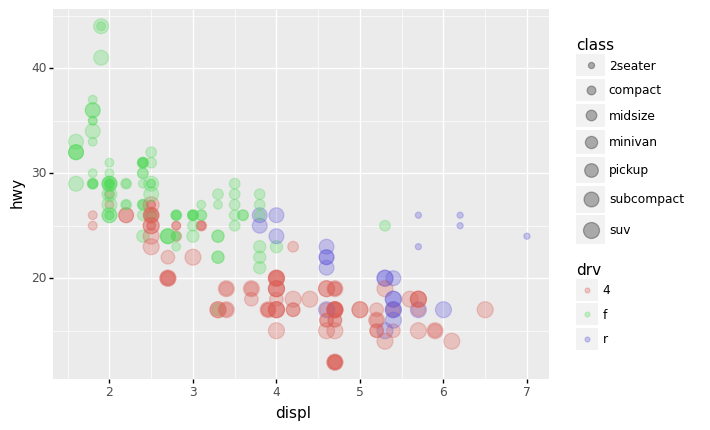

In [151]:
ggplot(data=mpg, mapping=aes(x='displ',y='hwy')) + geom_point(mapping=aes(size='class',color='drv'),alpha=0.3)

-   모든 $x$에 대하여 붉은색 점들이 대부분 초록색과 보라색 점들에 비하여
    아래쪽에 있음 $\to$ 4륜구동방식이 연비가 좋지 않음

## 산점도 + 점크기변경 + 색깔 (객체지향버전)

`-` 맵핑규칙

In [64]:
a1,a2

In [65]:
a3 = a2.copy() 

In [67]:
a3['color'] = 'drv'
a3['size'] = 'class'
a3

-   아래와 같이 선언해도 괜찮음

``` python
a3= aes(x='displ',y='hwy',color='drv',size='class')
```

In [68]:
point3=geom_point(a3)

/home/cgb2/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using size for a discrete variable is not advised.

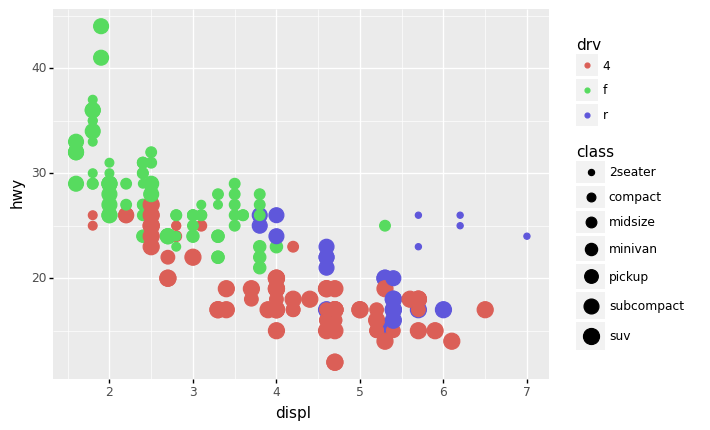

In [69]:
fig+point3

-   그림의 전체적인 투명도를 조절하면 좋겠음

/home/cgb2/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using size for a discrete variable is not advised.

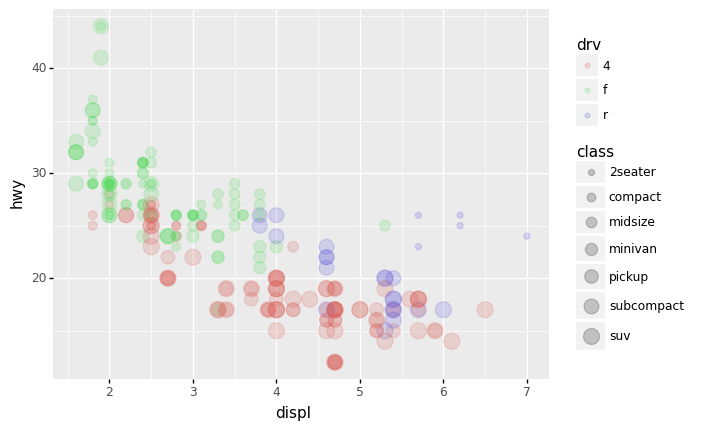

In [72]:
point3=geom_point(a3,alpha=0.2)
fig+point3

## 산점도 + 점크기변경 + 색깔 + 선추가

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using size for a discrete variable is not advised.
/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.

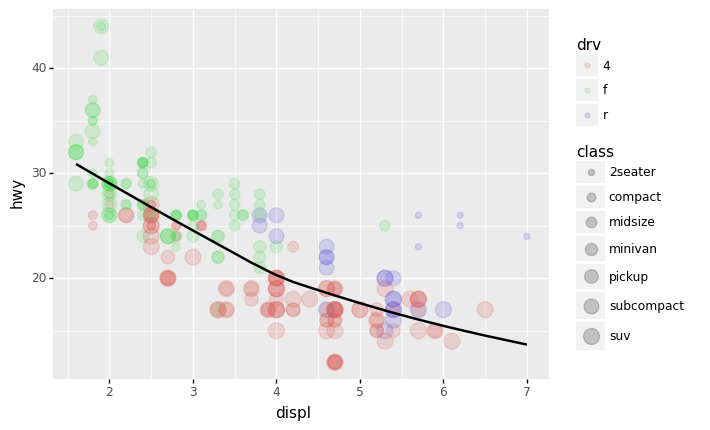

In [172]:
fig+point3+line1

## 산점도 + 점크기변경 + 색깔 + drv별로 선추가

`-` 맵핑규칙

In [73]:
a1,a2,a3

In [74]:
a4 = a2.copy() 
a4['color']='drv'
a4

In [77]:
line2 = geom_smooth(a4)

/home/cgb2/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using size for a discrete variable is not advised.
/home/cgb2/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.

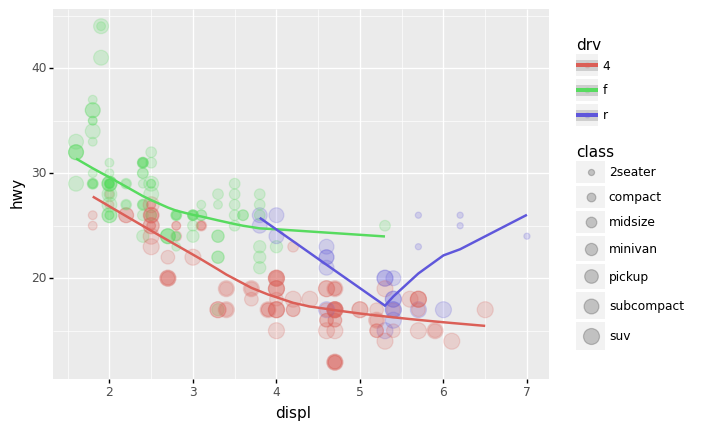

In [82]:
fig + point3 +line2

`-` 선의 색깔을 동일하게 하고 선의 타입을 변경하여 drv를 표시하고
싶다면?

In [179]:
a1,a2,a3,a4

In [180]:
a5=a1.copy()
a5['linetype']='drv' 
a5

In [189]:
line3 = geom_smooth(a5,size=0.5,color='gray')

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using size for a discrete variable is not advised.
/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.

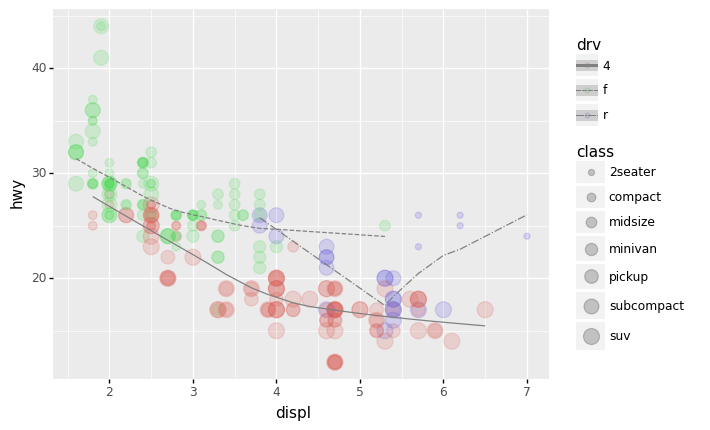

In [193]:
fig+point3+line3

`-` 전체적인 추세선도 추가하고 싶다면?

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using size for a discrete variable is not advised.
/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.

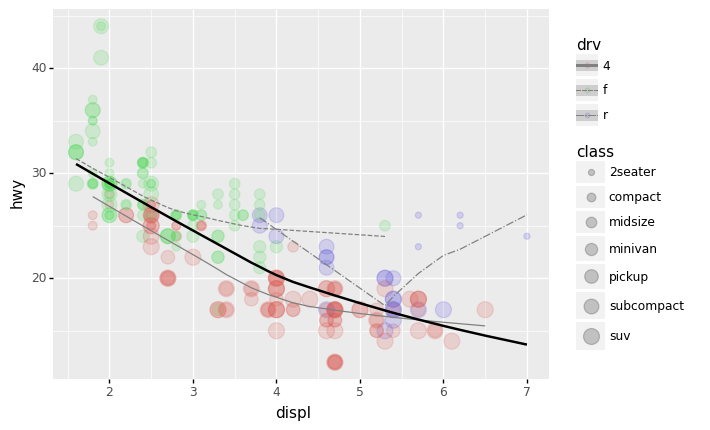

In [194]:
fig+point3+line3+line1

`-` 그려보니까 역시 drv별로 그려지는 추세선은 색깔별로 구분하는게
좋겠음.

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using size for a discrete variable is not advised.
/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.

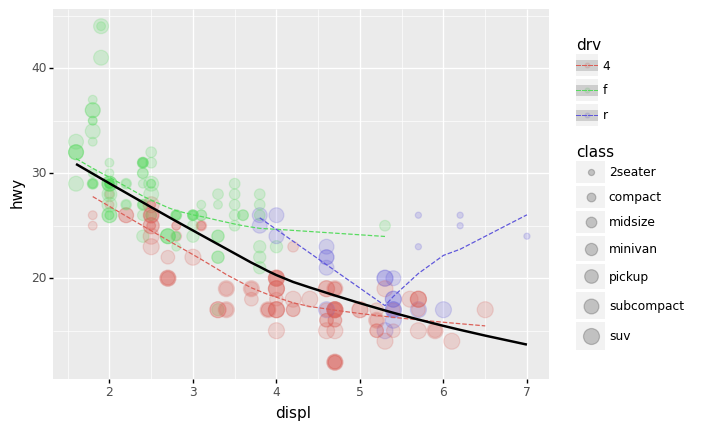

In [197]:
line2 = geom_smooth(a4,size=0.5,linetype='dashed')
fig+point3+line2+line1

`-` 고차원을 변수를 표현할 수 있는 무기는 다양하다.

-   산점도(포인트지옴): 점의크기, 점의형태, 점의색깔, 점의투명도
-   라인플랏(스무스지옴,라인지옴): 선의형태, 선의색깔, 선의굵기

# 결론

`-` 잘 훈련한다면 여러가지 형태의 고차원 그래프를 우리도 그릴 수 있다.
(마치 미나드처럼)

`-` 해들리위컴은 이러한 방법을 체계적으로 정리했다고 보여진다.

`-` 해들리위컴: 그래프는 데이터 + 지옴 + 맵핑(변수와 에스테틱간의
연결) + 스탯(통계) + 포지션 + 축 + 패싯그리드 7개의 조합으로 그릴 수
있다.

-   내생각: 지옴과 맵핑만 잘 다루어도 아주 다양한 그래프를 그릴 수 있음.